<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Proyecto_1_Final_WF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo /Codigo /week3/sales_predictions(1).csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_trans = df.groupby(['Outlet_Type','Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().head(10)
df_trans

Outlet_Type        Outlet_Establishment_Year
Grocery Store      1985                         1.796941e+05
                   1998                         1.883402e+05
Supermarket Type1  1987                         2.142664e+06
                   1997                         2.118395e+06
                   1999                         2.183970e+06
                   2002                         2.036725e+06
                   2004                         2.268123e+06
                   2007                         2.167465e+06
Supermarket Type2  2009                         1.851823e+06
Supermarket Type3  1985                         3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 <a list of 9 Text major ticklabel objects>)

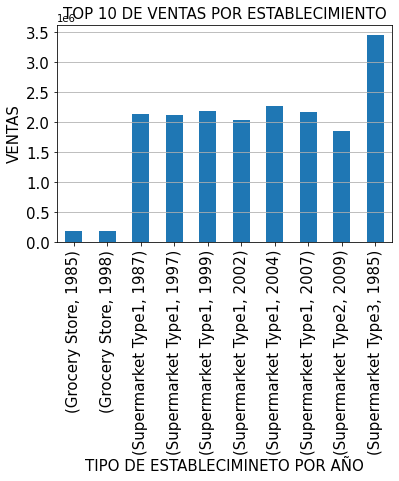

In [ ]:
df_trans.plot.bar()
plt.xlabel('TIPO DE ESTABLECIMINETO POR AÑO',fontsize = 15)
plt.ylabel('VENTAS',fontsize = 15)
plt.title('TOP 10 DE VENTAS POR ESTABLECIMIENTO',fontsize = 15)
plt.grid(axis = 'y')
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

In [ ]:
df_trans2 = df.groupby(['Item_Identifier','Outlet_Type'])['Item_Outlet_Sales'].sum().head(20)
df_trans2

Item_Identifier  Outlet_Type      
DRA12            Grocery Store          283.6308
                 Supermarket Type1     9927.0780
                 Supermarket Type2      850.8924
DRA24            Grocery Store          818.9340
                 Supermarket Type1     9990.9948
                 Supermarket Type3     4913.6040
DRA59            Grocery Store          740.3696
                 Supermarket Type1     8699.3428
                 Supermarket Type2     4442.2176
                 Supermarket Type3     7033.5112
DRB01            Supermarket Type1     3984.8130
                 Supermarket Type3      569.2590
DRB13            Grocery Store          948.7650
                 Supermarket Type1    11195.4270
DRB24            Supermarket Type1    12202.7824
DRB25            Grocery Store          214.3876
                 Supermarket Type1     5252.4962
                 Supermarket Type2     1715.1008
                 Supermarket Type3     2787.0388
DRB48            Grocery Store    

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

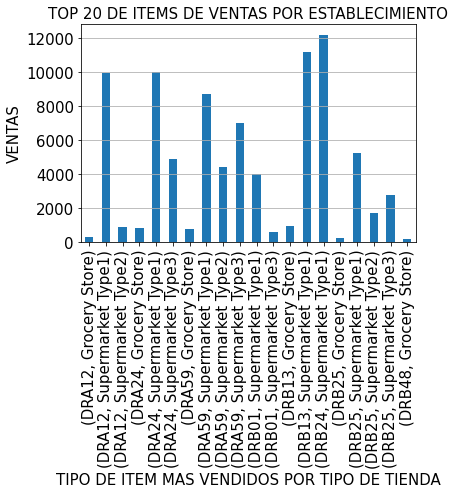

In [ ]:
df_trans2.plot.bar()
plt.xlabel('TIPO DE ITEM MAS VENDIDOS POR TIPO DE TIENDA',fontsize = 15)
plt.ylabel('VENTAS',fontsize = 15)
plt.title('TOP 20 DE ITEMS DE VENTAS POR ESTABLECIMIENTO',fontsize = 15)
plt.grid(axis = 'y')
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

PROYECTO_1_PARTE 4

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Text(0.5, 1.0, 'CANTIDAD DE ITEMS MAS VENDIDOS')

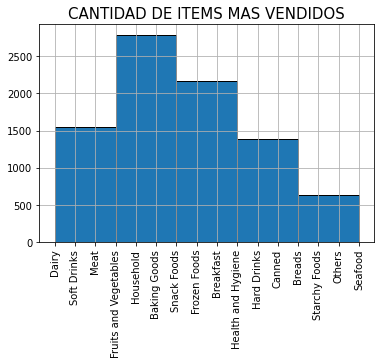

In [ ]:
Sales_Outlet= df.loc[:, 'Item_Type']
plt.xticks(rotation = 90)
Sales_Outlet.hist(bins=5,grid = True,alpha=1,edgecolor="black", linewidth=1,label='Sales_Outlet')
plt.title('CANTIDAD DE ITEMS MAS VENDIDOS',fontsize = 15)

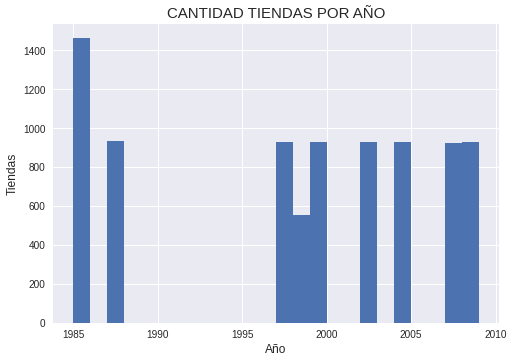

In [ ]:
plt.style.use('seaborn')
data = df['Outlet_Establishment_Year']

plt.hist(data, bins = np.arange(min(data), max(data) + 1, 1))
plt.title('CANTIDAD TIENDAS POR AÑO',fontsize = 15)
plt.xlabel('Año',fontsize=12)
plt.ylabel('Tiendas',fontsize=12)
plt.show()


Text(0.5, 1.0, 'TIPO DE TIENDAS')

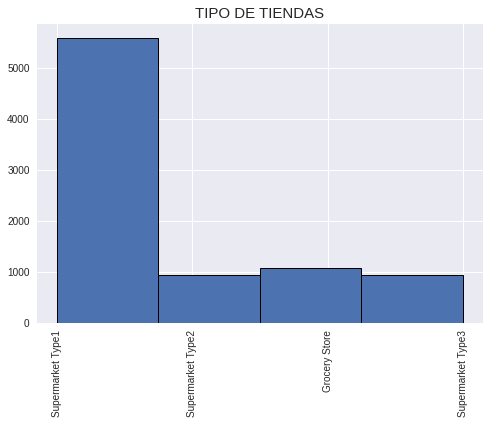

In [ ]:
Out_Loc = df.loc[:, 'Outlet_Type']
plt.xticks(rotation = 90)
Out_Loc.hist(bins=4,grid = True,alpha=1,edgecolor="black", linewidth=1,label='Sales_Outlet')
plt.title('TIPO DE TIENDAS',fontsize = 15)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Tipo de Item por Peso')

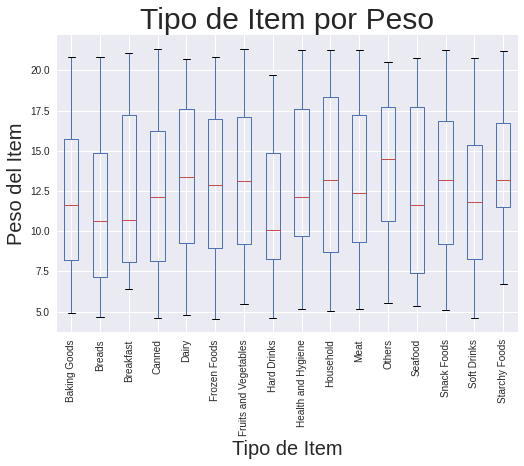

In [ ]:
df.boxplot(column = 'Item_Weight', by = 'Item_Type');
plt.title('');
plt.suptitle('');
plt.xticks(rotation = 90)
plt.ylabel('Peso del Item', fontsize = 20);
plt.xlabel('Tipo de Item', fontsize = 20);
plt.title("Tipo de Item por Peso",fontsize = 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Ventas por Tipo de Tienda')

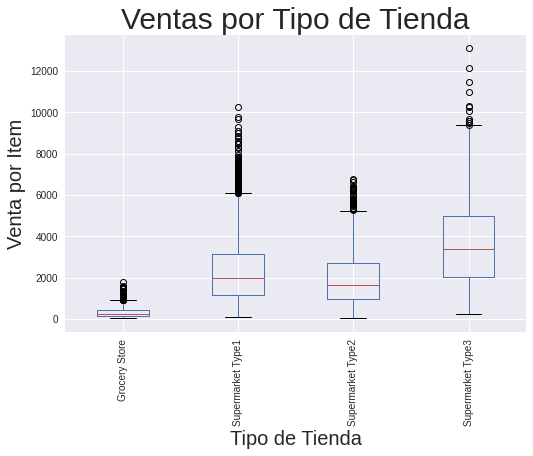

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type');
plt.title('');
plt.suptitle('');
plt.xticks(rotation = 90)
plt.ylabel('Venta por Item', fontsize = 20);
plt.xlabel('Tipo de Tienda', fontsize = 20);
plt.title("Ventas por Tipo de Tienda",fontsize = 30)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Crecimiento de Tipo de Tiendas por Año')

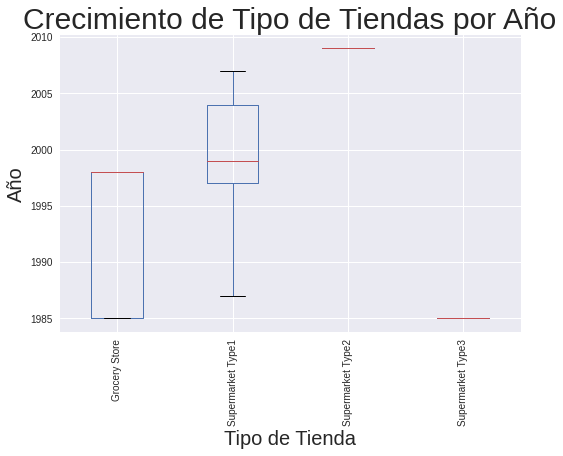

In [ ]:
df.boxplot(column = 'Outlet_Establishment_Year', by = 'Outlet_Type');
plt.title('');
plt.suptitle('');
plt.xticks(rotation = 90)
plt.ylabel('Año', fontsize = 20);
plt.xlabel('Tipo de Tienda', fontsize = 20);
plt.title("Crecimiento de Tipo de Tiendas por Año",fontsize = 30)

Proyecto 1 - Parte 5

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df = df.dropna(how = 'any')


In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df2 = df
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_Item_Identifier=df2.groupby(['Item_Identifier']).count()
df_Item_Identifier

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
DRA12,3,3,3,3,3,3,3,3,3,3,3
DRA24,3,3,3,3,3,3,3,3,3,3,3
DRA59,4,4,4,4,4,4,4,4,4,4,4
DRB01,2,2,2,2,2,2,2,2,2,2,2
DRB13,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
NCZ30,3,3,3,3,3,3,3,3,3,3,3
NCZ41,3,3,3,3,3,3,3,3,3,3,3
NCZ42,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
Identifier = np.unique(df2['Item_Identifier'])
Identifier

array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Ide = LabelEncoder()
Ide_Labels = Ide.fit_transform(df2['Item_Identifier'])
Ide_mappings = {index:label for index, label in enumerate(Ide.classes_)}
Ide_mappings 


{0: 'DRA12',
 1: 'DRA24',
 2: 'DRA59',
 3: 'DRB01',
 4: 'DRB13',
 5: 'DRB24',
 6: 'DRB25',
 7: 'DRB48',
 8: 'DRC01',
 9: 'DRC12',
 10: 'DRC13',
 11: 'DRC24',
 12: 'DRC25',
 13: 'DRC27',
 14: 'DRC36',
 15: 'DRC49',
 16: 'DRD01',
 17: 'DRD12',
 18: 'DRD13',
 19: 'DRD15',
 20: 'DRD24',
 21: 'DRD25',
 22: 'DRD27',
 23: 'DRD37',
 24: 'DRD49',
 25: 'DRD60',
 26: 'DRE01',
 27: 'DRE03',
 28: 'DRE12',
 29: 'DRE13',
 30: 'DRE15',
 31: 'DRE25',
 32: 'DRE27',
 33: 'DRE37',
 34: 'DRE48',
 35: 'DRE49',
 36: 'DRE60',
 37: 'DRF01',
 38: 'DRF03',
 39: 'DRF13',
 40: 'DRF15',
 41: 'DRF23',
 42: 'DRF25',
 43: 'DRF27',
 44: 'DRF36',
 45: 'DRF37',
 46: 'DRF49',
 47: 'DRF51',
 48: 'DRF60',
 49: 'DRG01',
 50: 'DRG03',
 51: 'DRG11',
 52: 'DRG13',
 53: 'DRG15',
 54: 'DRG23',
 55: 'DRG25',
 56: 'DRG27',
 57: 'DRG36',
 58: 'DRG37',
 59: 'DRG39',
 60: 'DRG48',
 61: 'DRG49',
 62: 'DRG51',
 63: 'DRH01',
 64: 'DRH03',
 65: 'DRH11',
 66: 'DRH13',
 67: 'DRH15',
 68: 'DRH23',
 69: 'DRH25',
 70: 'DRH36',
 71: 'DRH37',
 7

In [ ]:
df2['Item_Identifier_Label'] = Ide_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,8,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,656,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1277,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,750,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,367,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,1336,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,675,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
Fat_Content = np.unique(df2['Item_Fat_Content'])
Fat_Content

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [ ]:
Fat = LabelEncoder()
FatCont_Labels = Fat.fit_transform(df2['Item_Fat_Content'])
FatCont_mappings = {index:label for index, label in enumerate(Fat.classes_)}
FatCont_mappings 

{0: 'LF', 1: 'Low Fat', 2: 'Regular', 3: 'low fat', 4: 'reg'}

In [ ]:
df2['Item_Fat_Content_Label'] = FatCont_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Fat_Content_Label','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Fat_Content_Label,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,8,5.920,Regular,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,656,17.500,Low Fat,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1277,8.930,Low Fat,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,750,10.395,Regular,2,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,4,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,367,6.865,Low Fat,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,1336,10.600,Low Fat,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,675,7.210,Regular,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
Type = np.unique(df2['Item_Type'])
Type

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [ ]:
Type_1 = LabelEncoder()
Type_1_Labels = Type_1.fit_transform(df2['Item_Type'])
Type_1_mappings = {index:label for index, label in enumerate(Type_1.classes_)}
Type_1_mappings 

{0: 'Baking Goods',
 1: 'Breads',
 2: 'Breakfast',
 3: 'Canned',
 4: 'Dairy',
 5: 'Frozen Foods',
 6: 'Fruits and Vegetables',
 7: 'Hard Drinks',
 8: 'Health and Hygiene',
 9: 'Household',
 10: 'Meat',
 11: 'Others',
 12: 'Seafood',
 13: 'Snack Foods',
 14: 'Soft Drinks',
 15: 'Starchy Foods'}

In [ ]:
df2['Item_Type_Label'] = Type_1_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Fat_Content_Label','Item_Visibility','Item_Type','Item_Type_Label','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Fat_Content_Label,Item_Visibility,Item_Type,Item_Type_Label,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,1,0.016047,Dairy,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,8,5.920,Regular,2,0.019278,Soft Drinks,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,656,17.500,Low Fat,1,0.016760,Meat,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1277,8.930,Low Fat,1,0.000000,Household,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,750,10.395,Regular,2,0.000000,Baking Goods,0,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,4,0.083607,Frozen Foods,5,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,367,6.865,Low Fat,1,0.056783,Snack Foods,13,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,1336,10.600,Low Fat,1,0.035186,Health and Hygiene,8,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,675,7.210,Regular,2,0.145221,Snack Foods,13,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
Outlet_Iden = np.unique(df2['Outlet_Identifier'])
Outlet_Iden

array(['OUT013', 'OUT018', 'OUT035', 'OUT046', 'OUT049'], dtype=object)

In [ ]:
Outlet_Iden_1 = LabelEncoder()
Outlet_Iden_1_Labels = Outlet_Iden_1.fit_transform(df2['Outlet_Identifier'])
Outlet_Iden_1_mappings = {index:label for index, label in enumerate(Outlet_Iden_1.classes_)}
Outlet_Iden_1_mappings 

{0: 'OUT013', 1: 'OUT018', 2: 'OUT035', 3: 'OUT046', 4: 'OUT049'}

In [ ]:
df2['Outlet_Identifier_Label'] = Outlet_Iden_1_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Fat_Content_Label','Item_Visibility','Item_Type','Item_Type_Label','Item_MRP','Outlet_Identifier','Outlet_Identifier_Label','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Fat_Content_Label,Item_Visibility,Item_Type,Item_Type_Label,Item_MRP,Outlet_Identifier,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,1,0.016047,Dairy,4,249.8092,OUT049,4,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,8,5.920,Regular,2,0.019278,Soft Drinks,14,48.2692,OUT018,1,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,656,17.500,Low Fat,1,0.016760,Meat,10,141.6180,OUT049,4,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1277,8.930,Low Fat,1,0.000000,Household,9,53.8614,OUT013,0,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,750,10.395,Regular,2,0.000000,Baking Goods,0,51.4008,OUT018,1,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,4,0.083607,Frozen Foods,5,178.8318,OUT046,3,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,367,6.865,Low Fat,1,0.056783,Snack Foods,13,214.5218,OUT013,0,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,1336,10.600,Low Fat,1,0.035186,Health and Hygiene,8,85.1224,OUT035,2,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,675,7.210,Regular,2,0.145221,Snack Foods,13,103.1332,OUT018,1,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
Outlet_S = np.unique(df2['Outlet_Size'])
Outlet_S

array(['High', 'Medium', 'Small'], dtype=object)

In [ ]:
Outlet_S_1 = LabelEncoder()
Outlet_S_1_Labels = Outlet_S_1.fit_transform(df2['Outlet_Size'])
Outlet_S_1_mappings = {index:label for index, label in enumerate(Outlet_S_1.classes_)}
Outlet_S_1_mappings 

{0: 'High', 1: 'Medium', 2: 'Small'}

In [ ]:
df2['Outlet_Size_Label'] = Outlet_S_1_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Fat_Content_Label','Item_Visibility','Item_Type','Item_Type_Label','Item_MRP','Outlet_Identifier','Outlet_Identifier_Label','Outlet_Establishment_Year','Outlet_Size','Outlet_Size_Label','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Fat_Content_Label,Item_Visibility,Item_Type,Item_Type_Label,Item_MRP,Outlet_Identifier,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size,Outlet_Size_Label,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,1,0.016047,Dairy,4,249.8092,OUT049,4,1999,Medium,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,8,5.920,Regular,2,0.019278,Soft Drinks,14,48.2692,OUT018,1,2009,Medium,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,656,17.500,Low Fat,1,0.016760,Meat,10,141.6180,OUT049,4,1999,Medium,1,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1277,8.930,Low Fat,1,0.000000,Household,9,53.8614,OUT013,0,1987,High,0,Tier 3,Supermarket Type1,994.7052
5,FDP36,750,10.395,Regular,2,0.000000,Baking Goods,0,51.4008,OUT018,1,2009,Medium,1,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,4,0.083607,Frozen Foods,5,178.8318,OUT046,3,1997,Small,2,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,367,6.865,Low Fat,1,0.056783,Snack Foods,13,214.5218,OUT013,0,1987,High,0,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,1336,10.600,Low Fat,1,0.035186,Health and Hygiene,8,85.1224,OUT035,2,2004,Small,2,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,675,7.210,Regular,2,0.145221,Snack Foods,13,103.1332,OUT018,1,2009,Medium,1,Tier 3,Supermarket Type2,1845.5976


In [ ]:
Outlet_L_T = np.unique(df2['Outlet_Location_Type'])
Outlet_L_T

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [ ]:
Outlet_L_S_1 = LabelEncoder()
Outlet_L_S_1_Labels = Outlet_L_S_1.fit_transform(df2['Outlet_Location_Type'])
Outlet_L_S_1_mappings = {index:label for index, label in enumerate(Outlet_L_S_1.classes_)}
Outlet_L_S_1_mappings 

{0: 'Tier 1', 1: 'Tier 2', 2: 'Tier 3'}

In [ ]:
df2['Outlet_Location_Type_Label'] = Outlet_L_S_1_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Fat_Content_Label','Item_Visibility','Item_Type','Item_Type_Label','Item_MRP','Outlet_Identifier','Outlet_Identifier_Label','Outlet_Establishment_Year','Outlet_Size','Outlet_Size_Label','Outlet_Location_Type','Outlet_Location_Type_Label','Outlet_Type','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Fat_Content_Label,Item_Visibility,Item_Type,Item_Type_Label,Item_MRP,Outlet_Identifier,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size,Outlet_Size_Label,Outlet_Location_Type,Outlet_Location_Type_Label,Outlet_Type,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,1,0.016047,Dairy,4,249.8092,OUT049,4,1999,Medium,1,Tier 1,0,Supermarket Type1,3735.1380
1,DRC01,8,5.920,Regular,2,0.019278,Soft Drinks,14,48.2692,OUT018,1,2009,Medium,1,Tier 3,2,Supermarket Type2,443.4228
2,FDN15,656,17.500,Low Fat,1,0.016760,Meat,10,141.6180,OUT049,4,1999,Medium,1,Tier 1,0,Supermarket Type1,2097.2700
4,NCD19,1277,8.930,Low Fat,1,0.000000,Household,9,53.8614,OUT013,0,1987,High,0,Tier 3,2,Supermarket Type1,994.7052
5,FDP36,750,10.395,Regular,2,0.000000,Baking Goods,0,51.4008,OUT018,1,2009,Medium,1,Tier 3,2,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,4,0.083607,Frozen Foods,5,178.8318,OUT046,3,1997,Small,2,Tier 1,0,Supermarket Type1,3608.6360
8518,FDF22,367,6.865,Low Fat,1,0.056783,Snack Foods,13,214.5218,OUT013,0,1987,High,0,Tier 3,2,Supermarket Type1,2778.3834
8520,NCJ29,1336,10.600,Low Fat,1,0.035186,Health and Hygiene,8,85.1224,OUT035,2,2004,Small,2,Tier 2,1,Supermarket Type1,1193.1136
8521,FDN46,675,7.210,Regular,2,0.145221,Snack Foods,13,103.1332,OUT018,1,2009,Medium,1,Tier 3,2,Supermarket Type2,1845.5976


In [ ]:
Outlet_TP = np.unique(df2['Outlet_Type'])
Outlet_TP

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [ ]:
Outlet_TP_1 = LabelEncoder()
Outlet_TP_1_Labels = Outlet_TP_1.fit_transform(df2['Outlet_Type'])
Outlet_TP_1_mappings = {index:label for index, label in enumerate(Outlet_TP_1.classes_)}
Outlet_TP_1_mappings 

{0: 'Supermarket Type1', 1: 'Supermarket Type2'}

In [ ]:
df2['Outlet_Type_Label'] = Outlet_TP_1_Labels
df2[['Item_Identifier', 'Item_Identifier_Label','Item_Weight','Item_Fat_Content','Item_Fat_Content_Label','Item_Visibility','Item_Type','Item_Type_Label','Item_MRP','Outlet_Identifier','Outlet_Identifier_Label','Outlet_Establishment_Year','Outlet_Size','Outlet_Size_Label','Outlet_Location_Type','Outlet_Location_Type_Label','Outlet_Type','Outlet_Type_Label','Item_Outlet_Sales']].iloc[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Identifier_Label,Item_Weight,Item_Fat_Content,Item_Fat_Content_Label,Item_Visibility,Item_Type,Item_Type_Label,Item_MRP,Outlet_Identifier,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size,Outlet_Size_Label,Outlet_Location_Type,Outlet_Location_Type_Label,Outlet_Type,Outlet_Type_Label,Item_Outlet_Sales
0,FDA15,154,9.300,Low Fat,1,0.016047,Dairy,4,249.8092,OUT049,4,1999,Medium,1,Tier 1,0,Supermarket Type1,0,3735.1380
1,DRC01,8,5.920,Regular,2,0.019278,Soft Drinks,14,48.2692,OUT018,1,2009,Medium,1,Tier 3,2,Supermarket Type2,1,443.4228
2,FDN15,656,17.500,Low Fat,1,0.016760,Meat,10,141.6180,OUT049,4,1999,Medium,1,Tier 1,0,Supermarket Type1,0,2097.2700
4,NCD19,1277,8.930,Low Fat,1,0.000000,Household,9,53.8614,OUT013,0,1987,High,0,Tier 3,2,Supermarket Type1,0,994.7052
5,FDP36,750,10.395,Regular,2,0.000000,Baking Goods,0,51.4008,OUT018,1,2009,Medium,1,Tier 3,2,Supermarket Type2,1,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,386,20.750,reg,4,0.083607,Frozen Foods,5,178.8318,OUT046,3,1997,Small,2,Tier 1,0,Supermarket Type1,0,3608.6360
8518,FDF22,367,6.865,Low Fat,1,0.056783,Snack Foods,13,214.5218,OUT013,0,1987,High,0,Tier 3,2,Supermarket Type1,0,2778.3834
8520,NCJ29,1336,10.600,Low Fat,1,0.035186,Health and Hygiene,8,85.1224,OUT035,2,2004,Small,2,Tier 2,1,Supermarket Type1,0,1193.1136
8521,FDN46,675,7.210,Regular,2,0.145221,Snack Foods,13,103.1332,OUT018,1,2009,Medium,1,Tier 3,2,Supermarket Type2,1,1845.5976


In [ ]:
df3 = df2.loc[:, ['Item_Identifier_Label', 'Item_Weight','Item_Fat_Content_Label','Item_Visibility','Item_Type_Label','Item_MRP','Outlet_Identifier_Label','Outlet_Establishment_Year','Outlet_Size_Label','Outlet_Location_Type_Label','Outlet_Type_Label','Item_Outlet_Sales']]
df3.head()

,Item_Identifier_Label,Item_Weight,Item_Fat_Content_Label,Item_Visibility,Item_Type_Label,Item_MRP,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size_Label,Outlet_Location_Type_Label,Outlet_Type_Label,Item_Outlet_Sales
0,154,9.300,1,0.016047,4,249.8092,4,1999,1,0,0,3735.1380
1,8,5.920,2,0.019278,14,48.2692,1,2009,1,2,1,443.4228
2,656,17.500,1,0.016760,10,141.6180,4,1999,1,0,0,2097.2700
4,1277,8.930,1,0.000000,9,53.8614,0,1987,0,2,0,994.7052
5,750,10.395,2,0.000000,0,51.4008,1,2009,1,2,1,556.6088


In [ ]:
df.shape

(4650, 19)

In [ ]:
df3.shape

(4650, 12)

In [ ]:
df3.corr()

,Item_Identifier_Label,Item_Weight,Item_Fat_Content_Label,Item_Visibility,Item_Type_Label,Item_MRP,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size_Label,Outlet_Location_Type_Label,Outlet_Type_Label,Item_Outlet_Sales
Item_Identifier_Label,1.000000,0.051203,-0.093815,-0.038620,-0.017994,0.011484,-0.005500,-0.005644,-0.002213,0.002163,0.005382,0.013762
Item_Weight,0.051203,1.000000,-0.030444,-0.010229,0.034277,0.033330,-0.005584,-0.010596,-0.011948,0.004574,-0.002708,0.010972
Item_Fat_Content_Label,-0.093815,-0.030444,1.000000,0.045931,-0.114012,-0.000368,0.001341,-0.009893,-0.019272,0.001108,-0.000547,0.006425
Item_Visibility,-0.038620,-0.010229,0.045931,1.000000,-0.027527,-0.007292,0.003648,0.009324,0.006419,-0.001508,0.003516,-0.009644
Item_Type_Label,-0.017994,0.034277,-0.114012,-0.027527,1.000000,0.042174,0.003229,0.007613,0.000549,0.000799,-0.000505,0.030106
Item_MRP,0.011484,0.033330,-0.000368,-0.007292,0.042174,1.000000,-0.004251,0.004105,0.008723,0.002683,-0.000302,0.679594
Outlet_Identifier_Label,-0.005500,-0.005584,0.001341,0.003648,0.003229,-0.004251,1.000000,0.231037,0.567353,-0.948717,-0.352812,0.035901
Outlet_Establishment_Year,-0.005644,-0.010596,-0.009893,0.009324,0.007613,0.004105,0.231037,1.000000,0.536393,-0.001432,0.662985,-0.040869
Outlet_Size_Label,-0.002213,-0.011948,-0.019272,0.006419,0.000549,0.008723,0.567353,0.536393,1.000000,-0.597936,-0.133092,0.025965
Outlet_Location_Type_Label,0.002163,0.004574,0.001108,-0.001508,0.000799,0.002683,-0.948717,-0.001432,-0.597936,1.000000,0.558266,-0.049423


In [ ]:
df3.corr().sort_values(by = ['Item_Outlet_Sales'])

,Item_Identifier_Label,Item_Weight,Item_Fat_Content_Label,Item_Visibility,Item_Type_Label,Item_MRP,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size_Label,Outlet_Location_Type_Label,Outlet_Type_Label,Item_Outlet_Sales
Outlet_Type_Label,0.005382,-0.002708,-0.000547,0.003516,-0.000505,-0.000302,-0.352812,0.662985,-0.133092,0.558266,1.000000,-0.092191
Outlet_Location_Type_Label,0.002163,0.004574,0.001108,-0.001508,0.000799,0.002683,-0.948717,-0.001432,-0.597936,1.000000,0.558266,-0.049423
Outlet_Establishment_Year,-0.005644,-0.010596,-0.009893,0.009324,0.007613,0.004105,0.231037,1.000000,0.536393,-0.001432,0.662985,-0.040869
Item_Visibility,-0.038620,-0.010229,0.045931,1.000000,-0.027527,-0.007292,0.003648,0.009324,0.006419,-0.001508,0.003516,-0.009644
Item_Fat_Content_Label,-0.093815,-0.030444,1.000000,0.045931,-0.114012,-0.000368,0.001341,-0.009893,-0.019272,0.001108,-0.000547,0.006425
Item_Weight,0.051203,1.000000,-0.030444,-0.010229,0.034277,0.033330,-0.005584,-0.010596,-0.011948,0.004574,-0.002708,0.010972
Item_Identifier_Label,1.000000,0.051203,-0.093815,-0.038620,-0.017994,0.011484,-0.005500,-0.005644,-0.002213,0.002163,0.005382,0.013762
Outlet_Size_Label,-0.002213,-0.011948,-0.019272,0.006419,0.000549,0.008723,0.567353,0.536393,1.000000,-0.597936,-0.133092,0.025965
Item_Type_Label,-0.017994,0.034277,-0.114012,-0.027527,1.000000,0.042174,0.003229,0.007613,0.000549,0.000799,-0.000505,0.030106
Outlet_Identifier_Label,-0.005500,-0.005584,0.001341,0.003648,0.003229,-0.004251,1.000000,0.231037,0.567353,-0.948717,-0.352812,0.035901


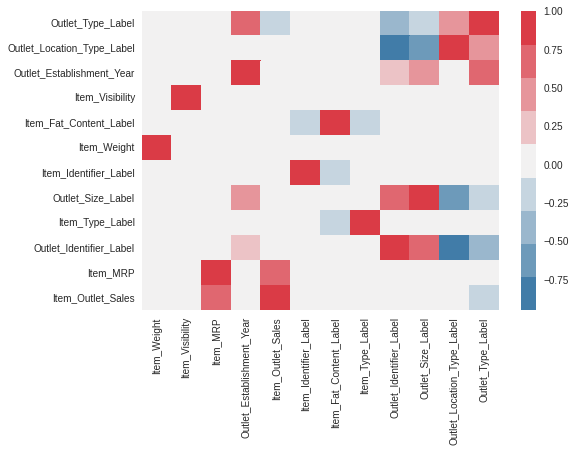

In [ ]:
#Lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['Item_Outlet_Sales']), cmap = sns.diverging_palette(240, 10, n=9))

La mayor relación Item_Outlet_Sales es con Item_MRP

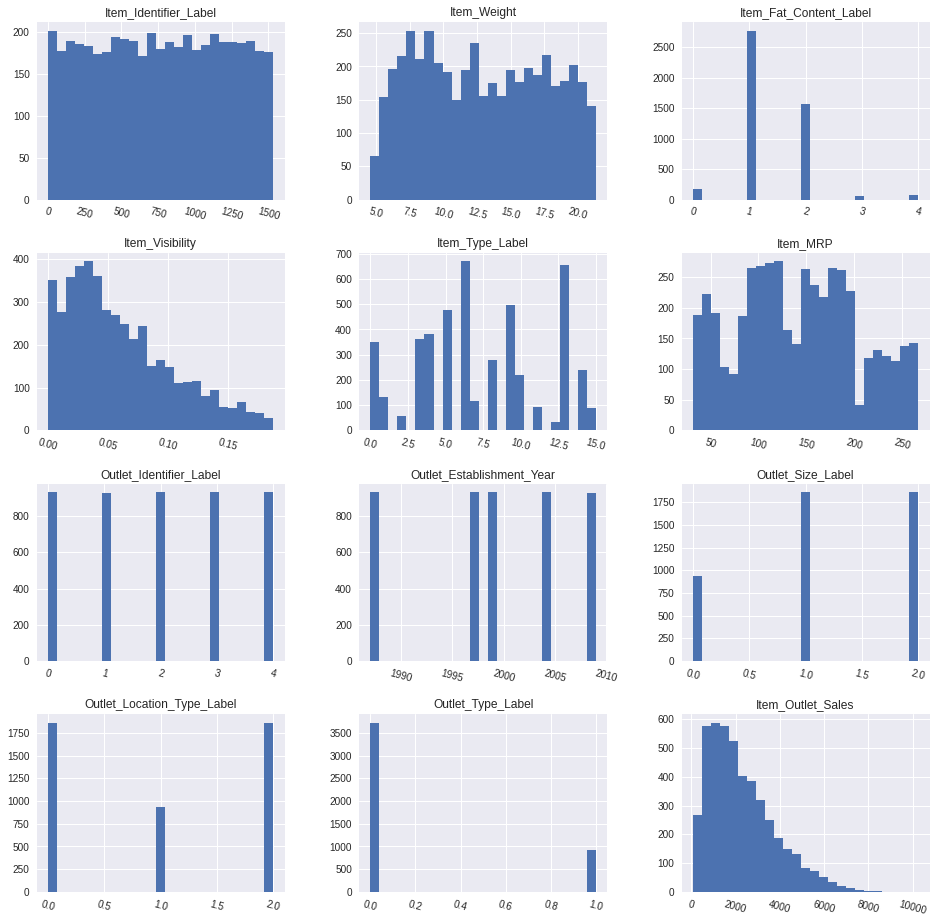

In [ ]:
df3.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [ ]:
X = df3.loc[:, ['Item_Identifier_Label', 'Item_Weight','Item_Fat_Content_Label','Item_Visibility','Item_Type_Label','Item_MRP','Outlet_Identifier_Label','Outlet_Establishment_Year','Outlet_Size_Label','Outlet_Location_Type_Label','Outlet_Type_Label']].values
X

array([[1.540e+02, 9.300e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 5.920e+00, 2.000e+00, ..., 1.000e+00, 2.000e+00,
        1.000e+00],
       [6.560e+02, 1.750e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.336e+03, 1.060e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       [6.750e+02, 7.210e+00, 2.000e+00, ..., 1.000e+00, 2.000e+00,
        1.000e+00],
       [4.900e+01, 1.480e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
X.shape

(4650, 11)

In [ ]:
y = df3.loc[:, 'Item_Outlet_Sales'].values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [ ]:
y.shape

(4650,)

In [ ]:
reg = LinearRegression(fit_intercept=True)

In [ ]:
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.predict(X[0].reshape(-1,11))

array([4129.32254257])

In [ ]:
y_pred_L = reg.predict(X[0:4650])
y_pred_L

array([4129.32254257,  499.9211253 , 2351.44499026, ..., 1516.503421  ,
       1387.89550644, 1164.93774362])

In [ ]:
Item_Outlet_Sales_pre_L = pd.DataFrame(data=y_pred_L)
Item_Outlet_Sales_pre_L.head(10)

,0
0,4129.322543
1,499.921125
2,2351.444990
3,905.072676
4,547.496040
5,950.494692
6,820.317242
7,2282.984429
8,2438.324876
9,1915.421902


In [ ]:
score_L = reg.score(X, y)
print(score_L)


0.47171301966177137


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = 3) 

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
preds = knn_model.predict(X_train)


In [ ]:
scoreknn = knn_model.score(X_train, y_train)
print(scoreknn)

0.6444839199411159


In [ ]:
Item_Outlet_Sales_pre = pd.DataFrame(preds)
Item_Outlet_Sales_pre.head(10)

,0
0,1162.264867
1,4177.229200
2,1769.696400
3,2693.604867
4,3740.908267
5,1862.686467
6,375.511200
7,5346.817867
8,973.399600
9,4947.115933


In [ ]:
Item_Outlet_Sales_pre = Item_Outlet_Sales_pre.rename(columns={0:'Item_Outlet_Sales_pre'})
Item_Outlet_Sales_pre

,Item_Outlet_Sales_pre
0,1162.264867
1,4177.229200
2,1769.696400
3,2693.604867
4,3740.908267
...,...
3715,1435.242867
3716,1154.719133
3717,1722.202667
3718,1810.754067


In [ ]:
df4 = df3
df4

,Item_Identifier_Label,Item_Weight,Item_Fat_Content_Label,Item_Visibility,Item_Type_Label,Item_MRP,Outlet_Identifier_Label,Outlet_Establishment_Year,Outlet_Size_Label,Outlet_Location_Type_Label,Outlet_Type_Label,Item_Outlet_Sales
0,154,9.300,1,0.016047,4,249.8092,4,1999,1,0,0,3735.1380
1,8,5.920,2,0.019278,14,48.2692,1,2009,1,2,1,443.4228
2,656,17.500,1,0.016760,10,141.6180,4,1999,1,0,0,2097.2700
4,1277,8.930,1,0.000000,9,53.8614,0,1987,0,2,0,994.7052
5,750,10.395,2,0.000000,0,51.4008,1,2009,1,2,1,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,386,20.750,4,0.083607,5,178.8318,3,1997,2,0,0,3608.6360
8518,367,6.865,1,0.056783,13,214.5218,0,1987,0,2,0,2778.3834
8520,1336,10.600,1,0.035186,8,85.1224,2,2004,2,1,0,1193.1136
8521,675,7.210,2,0.145221,13,103.1332,1,2009,1,2,1,1845.5976


In [ ]:
df4.shape

(4650, 12)

In [ ]:
from matplotlib import cm

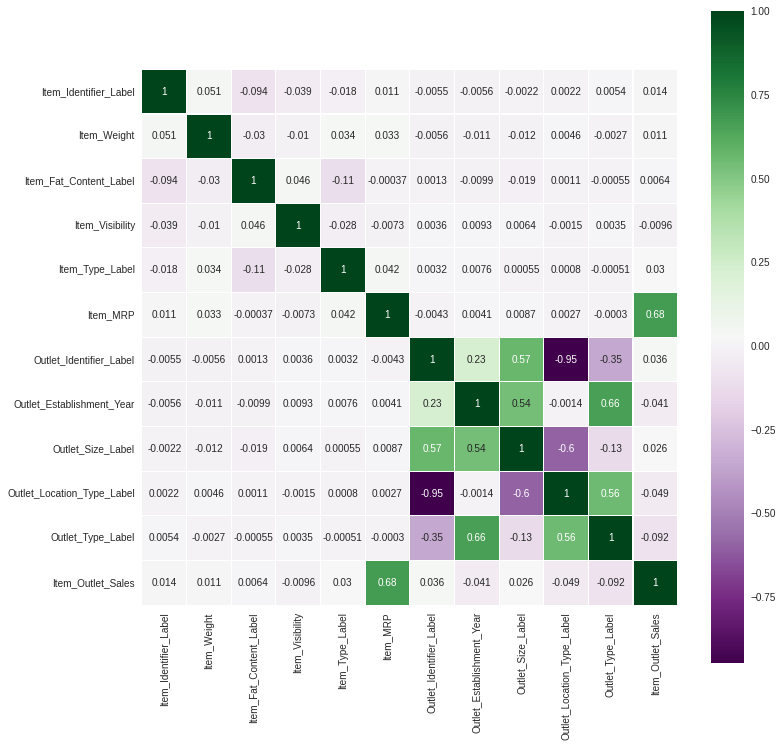

In [ ]:
corr = df4.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap=cm.PRGn, linecolor='white',
annot=True)

In [ ]:
print(df4.corr().nlargest(5, 'Item_Outlet_Sales').index)

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Identifier_Label',
       'Item_Type_Label', 'Outlet_Size_Label'],
      dtype='object')


In [ ]:
print(df4.corr().nlargest(5, 'Item_Outlet_Sales').values[:,11])

[1.         0.67959382 0.03590109 0.03010561 0.02596543]


In [ ]:
from sklearn import linear_model 
from sklearn.model_selection import cross_val_score

In [ ]:
X = df4[['Item_MRP','Outlet_Identifier_Label','Item_Type_Label','Outlet_Size_Label']]

In [ ]:
X.shape

(4650, 4)

In [ ]:
y = df4.iloc[:,11]

In [ ]:
y.shape

(4650,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
regression_model = LinearRegression()


In [ ]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predicted = regression_model.predict(X_test)

In [ ]:
y_predicted.shape

(1163,)

In [ ]:
Predicion  = pd.DataFrame(y_predicted)

In [ ]:
scorereg_model = regression_model.score(X_train, y_train)
scorereg_model

0.45816992757493935

In [ ]:
Predicion

,0
0,1900.900882
1,1778.666776
2,1806.358975
3,2534.976349
4,3096.756549
...,...
1158,2285.389795
1159,2045.095424
1160,2840.488998
1161,2640.223986


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [ ]:
rmse

1157621.1747933058

In [ ]:
r2

0.47885203246037134

In [ ]:
Slope = regression_model.coef_
Intercept = regression_model.intercept_

In [ ]:
Slope

array([16.28381978, 42.58524836, -2.09541733, -7.72419094])

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df5=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df5.head(10)

,Actual,Predicted
3127,2073.3012,1727.7510
668,1270.3464,1384.8640
52,810.9444,2014.7108
4735,1713.7692,3894.9300
941,1170.4764,2759.0752
3185,3199.8348,1058.6220
1354,1921.4988,2524.0478
3595,5331.7264,715.0692
6816,2395.5484,3435.5280
1001,703.0848,2163.1842


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1147.9754514187446
Mean Squared Error: 2523113.396307145
Root Mean Squared Error: 1588.431111602623


**La presentación de este flujo es CORE 2.pptx**